# Transformer
自己注意機構（Self-Attention）を利用  
従来のRNNやLSTMと異なり、Transformerはシーケンス全体を一度に処理することができ、並列化が可能
## 特徴
自己注意機構: 各入力トークンが他の全ての入力トークンに対して注意を払うことができ、長期依存関係を捉えるのが得意。これにより、RNNやLSTMよりも効率よく学習できる。  
並列処理の可能性: RNNやLSTMのようにシーケンシャルに処理するのではなく、全てのデータポイントを並列で処理するため、学習速度が速い。  
位置エンコーディング（Positional Encoding）: 順序の情報を保持するために、入力データに位置エンコーディングを加えることで、時系列データでも位置依存性を学習できる。
## モデルの構成
エンコーダー: 入力シーケンスの情報を圧縮して内部表現を作成する。
デコーダー: 圧縮された情報を元に、最終的な出力を生成する。



In [10]:
import torch
import torch.nn as nn

#Transformerモデル
class TransformerModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=2, output_size=1):
        super(TransformerModel, self).__init__()
        self.fc_in = nn.Linear(input_size, hidden_size)  # 入力サイズ変換
        encoder_layer = nn.TransformerEncoderLayer(d_model=hidden_size, nhead=8, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc_out = nn.Linear(hidden_size, output_size)  # 出力層

    def forward(self, x):
        x = self.fc_in(x)  # 形状: [batch, seq_len, hidden_size]
        x = self.transformer(x)  # Transformerエンコーダを適用
        return self.fc_out(x[:, -1, :])  # 最後の時間ステップの出力を取得

Epoch 10, Loss: 0.5152
Epoch 20, Loss: 0.3925
Epoch 30, Loss: 0.3018
Epoch 40, Loss: 0.2175
Epoch 50, Loss: 0.0336


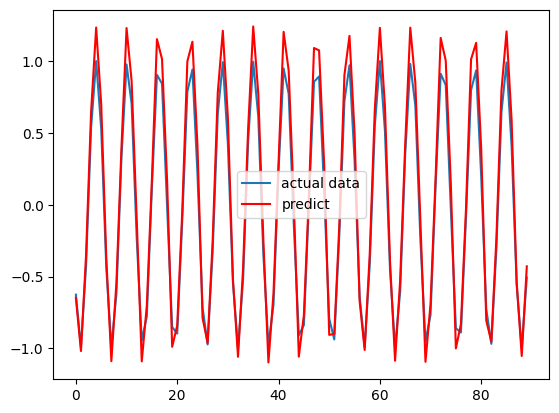

In [12]:
import numpy as np
import matplotlib.pyplot as plt

#データ作成
np.random.seed(42)
data = np.sin(np.linspace(0, 100, 100))  # サイン波
data = torch.tensor(data, dtype=torch.float32).view(-1, 1)  # PyTorchテンソル化

#データセット作成
def create_dataset(data, time_step=10):
    X, Y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step])
        Y.append(data[i + time_step])
    return torch.stack(X), torch.stack(Y)

time_step = 10
X, Y = create_dataset(data, time_step)

#モデル作成
model = TransformerModel(input_size=1, hidden_size=64, num_layers=2)

#損失関数と最適化手法
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

#学習ループ
epochs = 50
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X)  # モデルにデータを渡す
    loss = criterion(output, Y)  # 損失計算
    loss.backward()  # 逆伝播
    optimizer.step()  # 更新
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

#予測
model.eval()
predicted = model(X).detach().numpy()

#結果のプロット
plt.plot(Y.numpy(), label='actual data')
plt.plot(predicted, label='predict', color='red')
plt.legend()
plt.show()
